In [112]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# IVP for ODE
Swinging Pendulum:
$$
\frac{d^2 \theta}{dt^2} + \frac{g}{L} \sin \theta =0 
$$

For small values of $\theta$, we can use approximation $\theta \approx \sin \theta$ to get :
$$
\frac{d^2 \theta}{dt^2} + \frac{g}{L} \theta =0,\quad \theta(t_0) = \theta_0, \quad \theta' (t_0) = \theta'_0 
$$
When $\theta$ is large however, we cannot make the approximation and we might need some neat techniques to help us do this instead.

### 5.2 Euler's Method
- most elementary approximation technique for solving IVP
Well-posed IVP:
$$
\frac{dy}{dt} = f(t,y), \quad a\leq t \leq b, \quad y(a) = \alpha
$$
- we don't get continuous approximation, instead we get approximations to y at various values called **mesh points** . Once approximate solution is obtained at the points, the approximation solution at other points in the interval can be found by interpolation.

Mesh points are distributed equally throughout $[a,b]$ and by choosing a positive integer $N$ we select the mesh points:

$$
t_i = a+ih, \quad \text{for each } i = 0,1,2, \dots, N 
$$
$h=(b-a)/N = t_{i+1}-t_i$ is the **step size**. To derive Euler's method, we use Taylor's Theorem.

$$
y(t)_{i+1} = y(t_i) +(t_{i+1}-t_i)y'(t_i) + \frac{(t_{i+1}-t_i)^2}{2}y''(\xi_i)
$$
$y(t)$ satisfies diff eq, so $y' = f(t,y)$ and h subs in for the t yeah
$$
y(t)_{i+1} = y(t_i) +hf(t_i,y(t_i)) + \frac{(h)^2}{2}y''(\xi_i)
$$
Euler's method constructs $w_i \approx y(t_i)$ for each $i \in [1,N]$ by deleting the remainder term, we get:
$$
w_0 = \alpha \\
w_{i+1} = w_i + hf(t_i, w_i), \quad \text{ for each } i \in [1,N]
$$
This is called the **difference equation** associated with Euler's method.


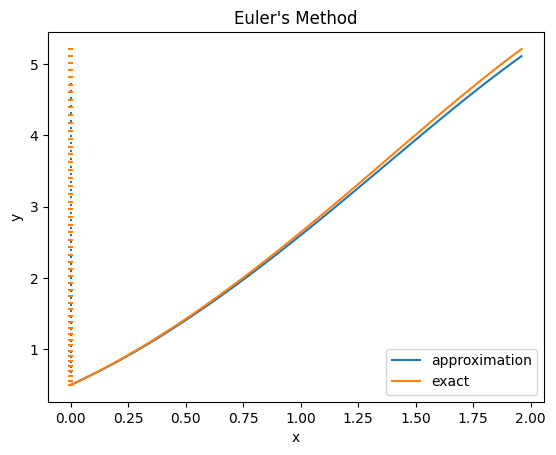

In [113]:
from matplotlib.collections import EventCollection

def f(t,y):
    return y-t**2 + 1
def Eulers(f, a, b, N, alpha):
    h = (b-a)/N
    t=np.arange(a,b,h)
    w=np.zeros(len(t))
    w[0]=alpha
    for i in range(1,N):
        w[i] = w[i-1] + h*f(t[i-1],w[i-1])
    return t,w


t,w=Eulers(f, 0, 2, 50, 0.5)

def exact(t):
    return (t+1)**2 -0.5 * np.e**t

y=exact(t)
#plt.plot(t,w,color='blue')
#plt.plot(t,y,color='orange')

xdata1=t
xdata2=t
ydata1=w
ydata2=y

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata1, ydata1, color='tab:blue', label='approximation')
ax.plot(xdata2, ydata2, color='tab:orange', label='exact')

# create the events marking the x data points
xevents1 = EventCollection(xdata1, color='tab:blue', linelength=0.01)
xevents2 = EventCollection(xdata2, color='tab:orange', linelength=0.02)

# create the events marking the y data points
yevents1 = EventCollection(ydata1, color='tab:blue', linelength=0.01,
                           orientation='vertical')
yevents2 = EventCollection(ydata2, color='tab:orange', linelength=0.02,
                           orientation='vertical')

# add the events to the axis
ax.add_collection(xevents1)
ax.add_collection(xevents2)
ax.add_collection(yevents1)
ax.add_collection(yevents2)

# set the limits
#ax.set_xlim([0, 1])
#ax.set_ylim([0, 1])

ax.set_title('Euler\'s Method' )
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend(loc='lower right')

# display the plot
plt.show()

In [114]:
def plot(t,y, w):
    xdata1=t
    xdata2=t
    ydata1=w
    ydata2=y

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xdata1, ydata1, color='tab:blue', label='approximation')
    ax.plot(xdata2, ydata2, color='tab:orange', label='exact')

    # create the events marking the x data points
    xevents1 = EventCollection(xdata1, color='tab:blue', linelength=0.01)
    xevents2 = EventCollection(xdata2, color='tab:orange', linelength=0.02)

    # create the events marking the y data points
    yevents1 = EventCollection(ydata1, color='tab:blue', linelength=0.01,
                            orientation='vertical')
    yevents2 = EventCollection(ydata2, color='tab:orange', linelength=0.02,
                            orientation='vertical')

    # add the events to the axis
    ax.add_collection(xevents1)
    ax.add_collection(xevents2)
    ax.add_collection(yevents1)
    ax.add_collection(yevents2)

    # set the limits
    #ax.set_xlim([0, 1])
    #ax.set_ylim([0, 1])

    ax.set_title('y(t)' )
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

    # display the plot
    plt.show()
    

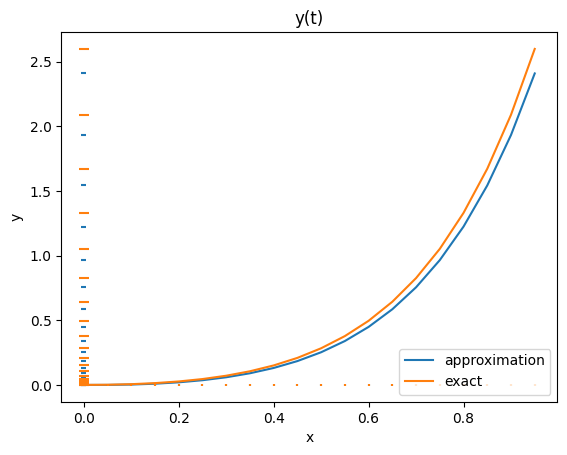

In [115]:
def f(t,y):
    return t*np.e**(3*t) - 2*y
t,w = Eulers(f, 0,1, 20, 0)

y = (1/25) * np.e**(-2*t) * (np.e**(5*t)*(5*t-1)+1)

plot(t,y,w)


### 5.4 Runge-Kutta Methods
- high-order local truncation error same as Taylor methods, but eliminate need to compute and evalutate derivatives of $f(t,y)$.

### Order two:
First step is to determine values for $a_1, \alpha_1, \beta_1$ with the property that $a_1f(t+\alpha_1, y+\beta_1)$ approximates
$$
T^{(2)}(t,y) = f(t,y) + \frac{h}{2} f'(t,y)
$$
with error no greater than $O(h^2)$

Since
$$
f'(t,y) = \frac{df}{dt} (t,y) = \frac{\partial f}{\partial t}(t,y) + \frac{\partial f}{\partial y} (t,y) \cdot y'(t) \quad \text{and} \quad y'(t) = f(t,y)
$$
we have 

$$
T^{(2)}(t,y) = f(t,y) + \frac{h}{2} \left[\frac{\partial f}{\partial t}(t,y) + \frac{\partial f}{\partial y} (t,y) \cdot f(t,y)\right]
$$
Expand $f(t+\alpha_1, y+\beta_1)$ in its Taylor polynomials of degree one about (t,y) gives:

$$
a_1 f(t+\alpha_1, y+\beta_1) = a_1 f(t,y)+a_1\alpha_1 f_t + \alpha_1\beta_1 f_y + a_1 \cdot R_1(t+\alpha_1,y+\beta_1)
$$

Matching the last two eq, we get: 
$$
f(t,y): a_1 =1; \quad f_t: a_1 \alpha_1 = \frac{h}{2}; \quad f_y: a_1 \beta_1 = \frac{h}{2}f(t,y)
$$
so:
$$
T^{(2)}(t,y) = f(t+\frac{h}{2},y+\frac{h}{2}f(t,y)) -R_1(t+\frac{h}{2},y+\frac{h}{2}f(t,y))
$$

In [116]:
#midpoint method
def midpt(f, a, b, N, alpha):
    h = (b-a)/N
    t=np.arange(a,b,h)
    w=np.zeros(len(t))
    w[0]=alpha
    for i in range(1,N):
        w[i] = w[i-1] + h*f(t[i-1]+h/2,w[i-1]+(h/2) *(f(t[i-1],w[i-1])))
    return t,w

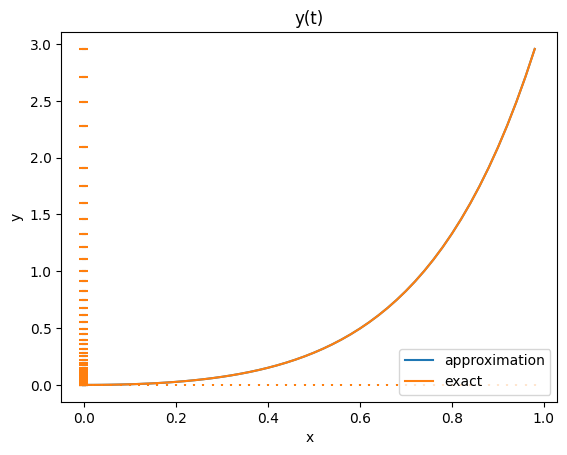

In [117]:
def f(t,y):
    return t*np.e**(3*t) - 2*y
t,w = midpt(f, 0,1, 50, 0)

y = (1/25) * np.e**(-2*t) * (np.e**(5*t)*(5*t-1)+1)

plot(t,y,w)


In [118]:
#modifiedeuler
def modiEuler(f, a, b, N, alpha):
    h = (b-a)/N
    t=np.arange(a,b,h)
    w=np.zeros(len(t))
    w[0]=alpha
    for i in range(1,N):
        w[i] = w[i-1] + (h/2)*(f(t[i-1],w[i-1]) + (f(t[i],w[i-1] + h*f(t[i-1],w[i-1]))))
    return t,w

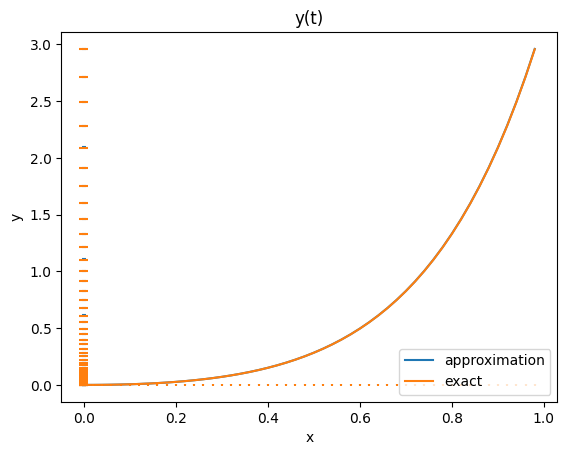

In [119]:
def f(t,y):
    return t*np.e**(3*t) - 2*y
t,w = modiEuler(f, 0,1, 50, 0)

y = (1/25) * np.e**(-2*t) * (np.e**(5*t)*(5*t-1)+1)

plot(t,y,w)

In [120]:
#runge-kutta
def RK4(f, a, b, N, alpha):
    h = (b-a)/N
    t=np.arange(a,b,h)
    w=np.zeros(len(t))
    w[0]=alpha
    for i in range(1,N):
        k1 = h*f(t[i-1],w[i-1])
        k2 = h*f(t[i-1 ]+h/2,w[i-1 ]+k1/2)
        k3 = h*f(t[i-1] + h/2,w[i-1 ]+ k2/2)
        k4 = h*f(t[i-1] + h,w[i-1 ] + k3)
        w[i] = w[i-1] + (k1 + 2*k2 + 2*k3+ k4)/6
    return t,w

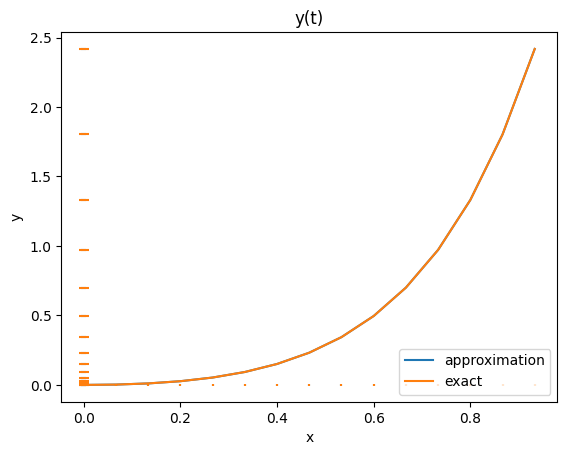

In [121]:
def f(t,y):
    return t*np.e**(3*t) - 2*y
t,w = RK4(f, 0,1, 15, 0)

y = (1/25) * np.e**(-2*t) * (np.e**(5*t)*(5*t-1)+1)

plot(t,y,w)